<a href="https://colab.research.google.com/github/amirkasaei/K-Nearest-Neighbors-with-scikit-learn/blob/main/K-Nearest%20Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Importing Required Libraries**

#### **load the required libraries**

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from math import sqrt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

#### **set GPU**

In [2]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# **Loading Data**

In [3]:
abalone_columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

In [4]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

In [5]:
abalone = pd.read_csv(url, names=abalone_columns)
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### **encode dataset**

In [6]:
le = LabelEncoder()

abalone[['Sex']] = abalone[['Sex']].apply(le.fit_transform, axis=0)

abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


#### **Data Correlation**

In [8]:
correlation_matrix = abalone.corr()
correlation_matrix

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Sex,1.000000,-0.036066,-0.038874,-0.042077,-0.021391,-0.001373,-0.032067,-0.034854,-0.034627
Length,-0.036066,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,-0.038874,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,-0.042077,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,-0.021391,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,-0.001373,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,-0.032067,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,-0.034854,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,-0.034627,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


# **helper function**

In [18]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
  print(f'{dom} Confusion matrix')
  cf = confusion_matrix(y_train_pred,y_train)
  sns.heatmap(cf,annot=True,yticklabels=classes, xticklabels=classes, cmap='Blues', fmt='g')
  plt.tight_layout()
  plt.show()

# **Classification**

### **Feature Selection**

In [13]:
classes = le.classes_
classes

array(['F', 'I', 'M'], dtype=object)

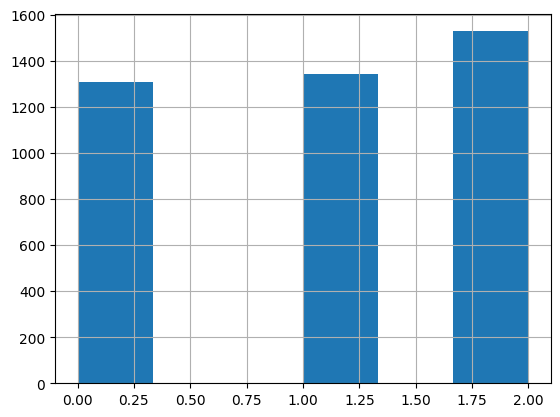

In [14]:
abalone['Sex'].hist(bins=6)
plt.show()

In [15]:
pd.DataFrame(correlation_matrix["Sex"])

,Sex
Sex,1.000000
Length,-0.036066
Diameter,-0.038874
Height,-0.042077
Whole weight,-0.021391
Shucked weight,-0.001373
Viscera weight,-0.032067
Shell weight,-0.034854
Rings,-0.034627


**divide given columns into two types of variables (target variable and feature variables).**

In [16]:
x = abalone[abalone_columns[1:]]
y = abalone['Sex']
x.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


### **Splitting Data**
70% training, 20% validation and 10% test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

### **Model**

In [ ]:
knn = KNeighborsClassifier(n_neighbors=10, weights='uniform')

In [ ]:
knn.fit(x_train, y_train)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
print(metrics.accuracy_score(y_test, y_pred))

# **Regression**

### **Feature Selection**

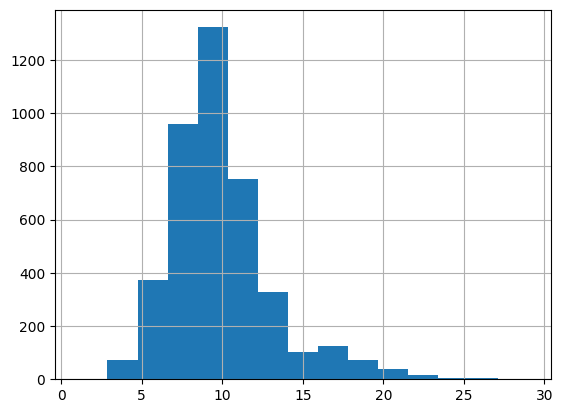

In [19]:
abalone["Rings"].hist(bins=15)
plt.show()

In [20]:
pd.DataFrame(correlation_matrix["Rings"])

,Rings
Sex,-0.034627
Length,0.556720
Diameter,0.574660
Height,0.557467
Whole weight,0.540390
Shucked weight,0.420884
Viscera weight,0.503819
Shell weight,0.627574
Rings,1.000000


**divide given columns into two types of variables (target variable and feature variables).**

In [21]:
x = abalone[abalone_columns[:-1]]
y = abalone['Rings']
x.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


### **Splitting Data**
70% training, 20% validation and 10% test

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=1)

### **Model**

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10, weights='uniform')

In [ ]:
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=10)

In [ ]:
y_pred = knn.predict(x_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
rmse